<a href="https://colab.research.google.com/github/reesecake/IMDB_scraper/blob/main/scraper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reese Lam
915042690

# 1. IMDB Scraping

In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

Functions for retrieving movie data

In [ ]:
def get_movie_name(row):
  row = row.a
  if not row:
    return None
  return row.text

In [ ]:
def get_movie_year(row):
  row = row.find('span', class_='lister-item-year text-muted unbold')
  if not row:
    return None
  return int(row.text[-5:].replace(')', ''))

In [ ]:
def get_movie_rating(rowRaw):
  rowRaw = rowRaw.find('span', class_='ipl-rating-star__rating').text
  if not rowRaw:
    return None
  return float(rowRaw)

In [ ]:
def get_movie_runtime(detailRow):
  detailRow = detailRow.find('span', class_='runtime')
  if not detailRow:
    return None
  return int(detailRow.text[:-4])

In [ ]:
def get_movie_votes(alltext_muted):
  alltext_muted = alltext_muted.find_all('span')[1]
  if not alltext_muted:
    return None
  return int(alltext_muted.text.replace(',', ''))

In [ ]:
def get_movie_genre(detailRow):
  detailRow = detailRow.find('span', class_='genre')
  if not detailRow:
    return None
  return (detailRow.text.split()[0]).replace(',', '')

In [ ]:
def get_movie_director(alltext_muted):
  alltext_muted = alltext_muted.a
  if not alltext_muted:
    return None
  return alltext_muted.text.split()[0]

Write a function that takes a BeautifulSoup table of movies and parses out the movie attributes.

In [ ]:
def getMovieResultsFromPage(table, movies):
  for rowRaw in table.find_all('div', class_='lister-item mode-detail'):
    row = rowRaw.find('h3', class_='lister-item-header')
    # continue the function here
    #
    movies['Name'].append(get_movie_name(row))
    movies['Rating'].append(get_movie_rating(rowRaw))
    movies['Year'].append(get_movie_year(row))

    detailRow = rowRaw.find('p', class_='text-muted text-small')
    movies['RunTime'].append(get_movie_runtime(detailRow))
    movies['Genre'].append(get_movie_genre(detailRow))

    alltext_muted = rowRaw.find_all('p', class_='text-muted text-small')
    # use second element because first is detailRow
    movies['Director'].append(get_movie_director(alltext_muted[1]))
    movies['Votes'].append(get_movie_votes(alltext_muted[2]))

You'll need somewhere to store the movies

In [ ]:
# initialize movie map
movies = {'Name':[],
          'Rating':[],
          'Year':[],
          'RunTime':[],
          'Votes':[],
          'Genre':[],
          'Director':[]}

Next, process the html pages using BeautifulSoup, and create a table with all movies.

In [ ]:
source = requests.get('https://www.imdb.com/list/ls068082370/').text
soup = BeautifulSoup(source, 'lxml')
table = soup.find('div', class_='lister-list')
# get movie data
getMovieResultsFromPage(table, movies)
# continue scraping until no more movies 
#

# navigate to second page
nextPage = soup.find('a', class_='flat-button lister-page-next next-page')['href']
sourceTwo = requests.get('https://www.imdb.com' + nextPage).text
soupTwo = BeautifulSoup(sourceTwo, 'lxml')
tableTwo = soupTwo.find('div', class_='lister-list')
getMovieResultsFromPage(tableTwo, movies)

# navigate to third page
lastPage = soupTwo.find('a', class_='flat-button lister-page-next next-page')['href']
sourceThree = requests.get('https://www.imdb.com' + lastPage).text
soupThree = BeautifulSoup(sourceThree, 'lxml')
tableThree = soupThree.find('div', class_='lister-list')
getMovieResultsFromPage(tableThree, movies)

print(movies)
len(movies['Name'])

{'Name': ['The Shawshank Redemption', 'The Godfather', 'The Dark Knight', 'The Godfather: Part II', 'Pulp Fiction', "Schindler's List", 'The Lord of the Rings: The Return of the King', '12 Angry Men', 'The Good, the Bad and the Ugly', 'Forrest Gump', 'Inception', 'The Lord of the Rings: The Fellowship of the Ring', 'Fight Club', 'Dangal', 'Star Wars: Episode V - The Empire Strikes Back', 'Star Wars: Episode IV - A New Hope', 'The Matrix', 'Goodfellas', "One Flew Over the Cuckoo's Nest", 'City of God', 'The Lord of the Rings: The Two Towers', 'Seven Samurai', 'Interstellar', 'Your Name.', 'The Silence of the Lambs', 'Léon: The Professional', 'Se7en', 'Saving Private Ryan', 'The Usual Suspects', 'Spirited Away', 'Life Is Beautiful', 'The Intouchables', 'Once Upon a Time in the West', "It's a Wonderful Life", 'City Lights', 'Babam ve Oglum', 'Alien', 'The Prestige', 'Gladiator', 'The Dark Knight Rises', 'Whiplash', 'Memento', 'The Green Mile', 'Apocalypse Now', 'Psycho', 'Raiders of the L

250

In [ ]:
# To answer the questions we need the data to be in a table
# create a data frame with pandas from the movie map
df = pd.DataFrame(movies, columns = ['Name', 'Rating', 'Year', 'RunTime', 'Votes', 'Genre', 'Director'])

### Question 1
Running the below sort_values() will organize the dataframe from fewest votes to most.
The movie with the fewest votes is Zulu and the most is The Shawshank Redemption.

In [ ]:
# Question 1
df.sort_values(by="Votes")

,Name,Rating,Year,RunTime,Votes,Genre,Director
75,Zulu,7.7,1964,138,35365,Drama,Cy Endfield
200,Nights of Cabiria,8.1,1957,110,42155,Drama,Federico Fellini
151,Andrei Rublev,8.1,1966,205,45426,Biography,Andrei Tarkovsky
158,Sunrise,8.1,1927,94,46331,Drama,F.W. Murnau
159,The Passion of Joan of Arc,8.1,1928,114,46337,Biography,Carl Theodor Dreyer
...,...,...,...,...,...,...,...
4,Pulp Fiction,8.9,1994,154,1792527,Crime,Quentin Tarantino
12,Fight Club,8.8,1999,139,1819909,Drama,David Fincher
10,Inception,8.8,2010,148,2022175,Action,Christopher Nolan
2,The Dark Knight,9.0,2008,152,2260143,Action,Christopher Nolan


### Question 2
With the bar graph below, it is evident that Drama has the most movies of any genre.
Film-Noir has the fewest.

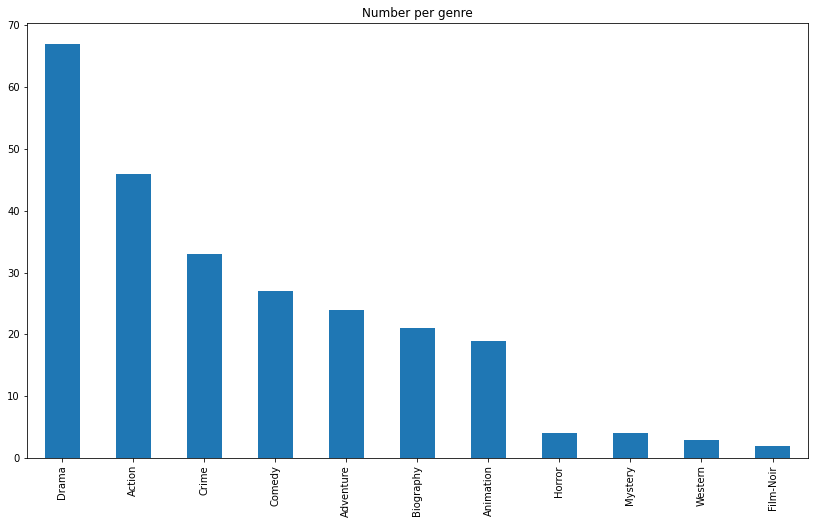

In [ ]:
# Question 2
df['Genre'].value_counts().plot(kind='bar', figsize=(14,8), title="Number per genre")

### Question 3
The top five directors are found in the descending list of movies per director:

Stanley Kubrick, Steven Spielberg, Martin Scorsese, and Christopher Nolan are all tied at 7 movies. Alfred Hitchcock has 6.

In [ ]:
# Question 3
df['Director'].value_counts()

Stanley Kubrick         7
Steven Spielberg        7
Martin Scorsese         7
Christopher Nolan       7
Alfred Hitchcock        6
                       ..
Dean DeBlois            1
Neeraj Pandey           1
Tate Taylor             1
Paul Thomas Anderson    1
James Mangold           1
Name: Director, Length: 160, dtype: int64

# 2. Severe Storms with Google BigQuery
 

In [ ]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


2. Declare the Cloud project ID which will be used throughout this notebook. You need to login your BigQuery to find out your own project id and paste it below.

In [ ]:
# For example mine is test-project-ecs189l, so I will run project_id = 'test-project-ecs189l'
# project_id = 'Paste Your Project ID here to Replace This String'
project_id = 'ecs-189l-hw1-293109'

In [ ]:
import tqdm

Read the database into a data frame

In [ ]:
df = pd.io.gbq.read_gbq('''SELECT
  LOWER(event_type) as event_type,
  COUNT(event_id) as count_storms
FROM
  `bigquery-public-data.noaa_historic_severe_storms.storms_*`
WHERE
  _TABLE_SUFFIX BETWEEN '1950' AND '2000'
GROUP BY
  event_type
ORDER BY
  count_storms desc
LIMIT 40  
''', project_id)

### Question 1
Limiting the query to the top 40 event types:

The most frequently occurring event type is thunderstorm wind at 169,873 storms

In [ ]:
# Question 1
df.loc[df['count_storms'] == df['count_storms'].max()]

,event_type,count_storms
0,thunderstorm wind,169873


### Question 2
Querying the data and grouping for the number of tornadoes in each decade. Each row has 10 years (19x0-19x9).

In [ ]:
df2 = pd.io.gbq.read_gbq('''SELECT
  LOWER(event_type) as event_type,
  COUNT(event_id) as count_storms,
  (CASE WHEN _TABLE_SUFFIX >= '1950' and _TABLE_SUFFIX < '1960' then '1950s'
        WHEN _TABLE_SUFFIX >= '1960' and _TABLE_SUFFIX < '1970' then '1960s'
        WHEN _TABLE_SUFFIX >= '1970' and _TABLE_SUFFIX < '1980' then '1970s'
        WHEN _TABLE_SUFFIX >= '1980' and _TABLE_SUFFIX < '1990' then '1980s'
        WHEN _TABLE_SUFFIX >= '1990' and _TABLE_SUFFIX < '2000' then '1990s'
   END) as year
FROM
  `bigquery-public-data.noaa_historic_severe_storms.storms_*`
WHERE
  _TABLE_SUFFIX BETWEEN '1950' AND '1999'
  AND event_type = 'tornado'
GROUP BY
  event_type,
  year
''', project_id)

In [ ]:
# Question 2
df2

,event_type,count_storms,year
0,tornado,10935,1990s
1,tornado,9371,1970s
2,tornado,9008,1980s
3,tornado,7270,1960s
4,tornado,5232,1950s


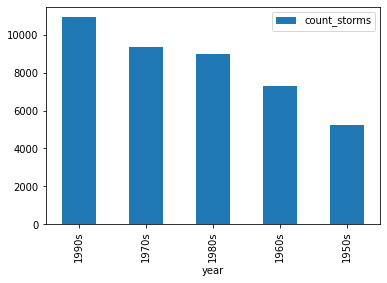

In [ ]:
df2.plot.bar(x='year', y='count_storms')

In [ ]:
# Question 3

# 3. 2020 Election Polls

You are on your own here. Here are some suggestions:

* Identify and download the file you need from the web site
* Store the file in a data frame
* Answer the two questions

In [ ]:
import pandas as pd
five38Url = 'https://projects.fivethirtyeight.com/polls-page/president_primary_polls.csv'
df = pd.read_csv(five38Url)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
# used for looking at data
df

,question_id,poll_id,cycle,state,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,pollster_rating_name,fte_grade,sample_size,population,population_full,methodology,office_type,start_date,end_date,sponsor_candidate,internal,partisan,tracking,nationwide_batch,created_at,notes,url,stage,party,answer,candidate_id,candidate_name,pct
0,127126,67903,2020,NaN,552,Winston Group,NaN,NaN,Winston Group,385.0,Winston Group,B/C,NaN,rv,rv-d,Live Phone,U.S. President,4/27/20,4/28/20,NaN,False,NaN,False,False,8/4/20 17:22,NaN,https://www.winningtheissues.org/wp-content/up...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,54.00
1,127126,67903,2020,NaN,552,Winston Group,NaN,NaN,Winston Group,385.0,Winston Group,B/C,NaN,rv,rv-d,Live Phone,U.S. President,4/27/20,4/28/20,NaN,False,NaN,False,False,8/4/20 17:22,NaN,https://www.winningtheissues.org/wp-content/up...,primary,DEM,Sanders,13257,Bernard Sanders,17.00
2,122156,65938,2020,NaN,1102,Emerson College,NaN,NaN,Emerson College,88.0,Emerson College,A-,479.0,lv,lv-d,IVR/Online,U.S. President,4/26/20,4/28/20,NaN,False,NaN,False,False,4/28/20 19:01,NaN,https://emersonpolling.reportablenews.com/pr/a...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,67.98
3,122156,65938,2020,NaN,1102,Emerson College,NaN,NaN,Emerson College,88.0,Emerson College,A-,479.0,lv,lv-d,IVR/Online,U.S. President,4/26/20,4/28/20,NaN,False,NaN,False,False,4/28/20 19:01,NaN,https://emersonpolling.reportablenews.com/pr/a...,primary,DEM,Sanders,13257,Bernard Sanders,23.66
4,121552,65756,2020,NaN,568,YouGov,352,Economist,YouGov,391.0,YouGov,B,585.0,lv,lv-d,Online,U.S. President,4/12/20,4/14/20,NaN,False,NaN,False,False,4/15/20 09:11,NaN,https://docs.cdn.yougov.com/6fdl23u606/econTab...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,49.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18774,92392,57184,2020,NaN,1416,Harris Insights & Analytics,960,Hill.TV,HarrisX,133.0,Harris Insights & Analytics,C,370.0,rv,rv-d,Online,U.S. President,11/5/18,11/6/18,NaN,False,NaN,False,False,12/27/18 03:50,NaN,https://thehill.com/hilltv/what-americas-think...,primary,DEM,Sanders,13257,Bernard Sanders,20.00
18775,92392,57184,2020,NaN,1416,Harris Insights & Analytics,960,Hill.TV,HarrisX,133.0,Harris Insights & Analytics,C,370.0,rv,rv-d,Online,U.S. President,11/5/18,11/6/18,NaN,False,NaN,False,False,12/27/18 03:50,NaN,https://thehill.com/hilltv/what-americas-think...,primary,DEM,Booker,13287,Cory A. Booker,5.00
18776,92392,57184,2020,NaN,1416,Harris Insights & Analytics,960,Hill.TV,HarrisX,133.0,Harris Insights & Analytics,C,370.0,rv,rv-d,Online,U.S. President,11/5/18,11/6/18,NaN,False,NaN,False,False,12/27/18 03:50,NaN,https://thehill.com/hilltv/what-americas-think...,primary,DEM,Harris,13288,Kamala D. Harris,5.00
18777,92392,57184,2020,NaN,1416,Harris Insights & Analytics,960,Hill.TV,HarrisX,133.0,Harris Insights & Analytics,C,370.0,rv,rv-d,Online,U.S. President,11/5/18,11/6/18,NaN,False,NaN,False,False,12/27/18 03:50,NaN,https://thehill.com/hilltv/what-americas-think...,primary,DEM,Bloomberg,13289,Michael Bloomberg,5.00


### Question 1
Using the unique() function to get all unique data from candidate_name column returns an array of each candidate. Using len() results in 79 unique candidates in the latest poll

In [ ]:
len(df['candidate_name'].unique())

79

### Question 2
From the 18,779 different polls, there was an average sample size of:

In [ ]:
df['sample_size'].mean()

1594.0069626693803